In [1]:
%matplotlib inline
%run support.py
import os
plt.style.use('~/Shared JupyterHub Notebooks/interactive.mplstyle')
#datafolder = "./data/Measurements/Cooldown20200826"
import matplotlib.gridspec as gridspec
from scipy.io import loadmat
from scipy.optimize import curve_fit
from scipy.interpolate import interp2d
from pathlib import Path
from datetime import datetime, timedelta

# Precooling After and Before Fixing Wires

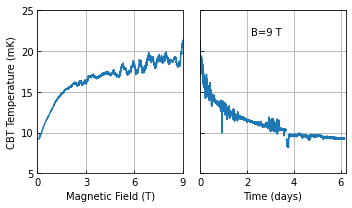

In [2]:
datafolder = "/mnt/Measurement_Data/phys-dots-26/Cooldown20200826"
gT_Cu = 21.683533093853708e-6
precool_wavenums = [634, 635]
fig, ax = plt.subplots(1,2,figsize=(5,3))

for i, wn in enumerate(precool_wavenums):
    filename = f"d{wn}_time.h5"
    with h5py.File(f"{datafolder}/{filename}", 'r') as f:
        t = np.array(f['x_array'])
        #dt = np.array([datetime.fromtimestamp(t[i]) for i in range(len(t))])
        gCu = np.array(f['gCu'])
        b = np.array(f['bdemagIPSB'])
        #print(f['metadata'].attrs['sweep_logs'])
    gCu = 1/(1/gCu - 2*R_wire)
    gCu = MakeSmoothie(gCu, ws=150)
    if i==0:
        t0=t[0]
        ti = t[b<9][-1]
    if i==len(precool_wavenums)-1:
        tf = t[-1]

    mag_filter = b<9
    precool_filter = b>=8.99
        
    ax[0].plot(b[mag_filter], Tcbt_Cu(gCu[mag_filter]/gT_Cu, Ec=Ec_Cu*1e-3)*1e3, color=colors[0])
    ax[1].plot((t[precool_filter]-ti)/3600/24, Tcbt_Cu(gCu[precool_filter]/gT_Cu, Ec=Ec_Cu*1e-3)*1e3, color=colors[0])
    
for i in range(2):
    ax[i].set_ylim(5,30)
    ax[i].grid()
    ax[i].set_ylim(5,25)
    ax[i].set_yticks(np.linspace(5,25,5))
    
#ax.set_yscale('log')
ax[0].set_xlabel("Magnetic Field (T)")
ax[0].set_ylabel("CBT Temperature (mK)")
ax[0].set_xticks([0,3,6,9])
ax[0].set_xlim(0,9)
ax[1].set_xlim(0,6.2)
ax[1].set_yticklabels([])
ax[1].set_xlabel("Time (days)")
ax[1].text(2.15, 22, "B=9 T")

#ax[1].tick_params(axis='x', rotation=45)
fig.savefig("FS6.pdf")